In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/sample_data/musk_csv.csv')

In [4]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [5]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [7]:
#dropping the columns

df.drop(columns=['ID','molecule_name','conformation_name'], inplace=True)

In [8]:
df.isna().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
        ..
f163     0
f164     0
f165     0
f166     0
class    0
Length: 167, dtype: int64

In [9]:
#Splitting dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df, df['class'], test_size = 0.20,random_state=120)

In [11]:
print(X_train.shape)
print(X_test.shape)

(5278, 167)
(1320, 167)


In [10]:
import keras
from keras.models import Model
from keras.layers import *

inp=Input(shape=(167,))
x=Dense(500,activation='sigmoid',name='Hidden_layer1')(inp)
x=Dense(300,activation='relu',name='Hidden_layer2')(x)
x=Dense(155,activation='sigmoid',name='Hidden_layer3')(x)
x=Dense(80,activation='relu',name='Hidden_layer4')(x)
output=Dense(1,activation='sigmoid',name='Output_layer')(x)

In [12]:
model=Model(inp,output)


In [15]:
from keras import optimizers

l_rate=0.00001
training_epoch=50
batch_size=700
adma=optimizers.Adam(lr=l_rate)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [16]:
op=model.fit(X_train,y_train,batch_size=batch_size,epochs=training_epoch,verbose=2,validation_data=(X_test,y_test))

Epoch 1/50
8/8 - 0s - loss: 0.4274 - accuracy: 0.8452 - val_loss: 0.3725 - val_accuracy: 0.8485
Epoch 2/50
8/8 - 0s - loss: 0.3416 - accuracy: 0.8494 - val_loss: 0.2910 - val_accuracy: 0.9189
Epoch 3/50
8/8 - 0s - loss: 0.2459 - accuracy: 0.9183 - val_loss: 0.1982 - val_accuracy: 0.9341
Epoch 4/50
8/8 - 0s - loss: 0.1601 - accuracy: 0.9433 - val_loss: 0.1467 - val_accuracy: 0.9492
Epoch 5/50
8/8 - 0s - loss: 0.1146 - accuracy: 0.9585 - val_loss: 0.1162 - val_accuracy: 0.9530
Epoch 6/50
8/8 - 0s - loss: 0.0917 - accuracy: 0.9684 - val_loss: 0.1026 - val_accuracy: 0.9614
Epoch 7/50
8/8 - 0s - loss: 0.0789 - accuracy: 0.9727 - val_loss: 0.1012 - val_accuracy: 0.9621
Epoch 8/50
8/8 - 0s - loss: 0.0609 - accuracy: 0.9784 - val_loss: 0.0827 - val_accuracy: 0.9667
Epoch 9/50
8/8 - 0s - loss: 0.0549 - accuracy: 0.9793 - val_loss: 0.0852 - val_accuracy: 0.9667
Epoch 10/50
8/8 - 0s - loss: 0.0613 - accuracy: 0.9761 - val_loss: 0.0779 - val_accuracy: 0.9712
Epoch 11/50
8/8 - 0s - loss: 0.0573 - a

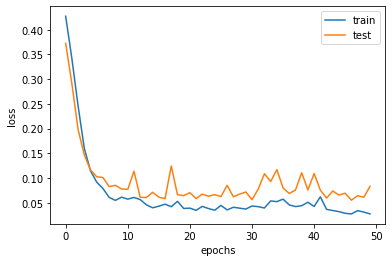

In [17]:
plt.plot(op.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()
plt.show()

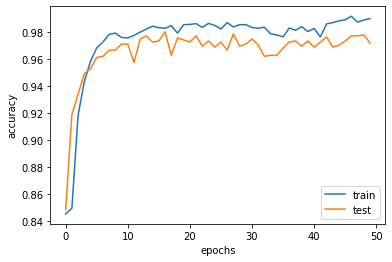

In [18]:
plt.plot(op.history['accuracy'],label='train')
plt.xlabel('epochs')
plt.plot(op.history['val_accuracy'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [21]:
y_pred=model.predict(X_test).astype('int').flatten()

In [22]:
from sklearn.metrics import classification_report
cls = classification_report(y_test,y_pred)
print(cls)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1120
           1       0.00      0.00      0.00       200

    accuracy                           0.85      1320
   macro avg       0.42      0.50      0.46      1320
weighted avg       0.72      0.85      0.78      1320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
pip install h5py

In [48]:
model.save("model.h5")